# Disease Condition prediction based on drug reviews

Dataset: https://archive.ics.uci.edu/dataset/461/drug+review+dataset+druglib+com

## Importing libraries

In [59]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [60]:
df=pd.read_csv('archive/drugsCom_raw.csv')

In [61]:
df.head()

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"   
1                "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."   
2  "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."   
3                                                                                                                                                                                                                                                                                                                       "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it mad

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
 7   source       215063 non-null  object
dtypes: int64(3), object(5)
memory usage: 13.1+ MB


In [58]:
df.condition.value_counts()

condition
Birth Control                                                          38436
Depression                                                             12164
Pain                                                                    8245
Anxiety                                                                 7812
Acne                                                                    7435
Bipolar Disorde                                                         5604
Insomnia                                                                4904
Weight Loss                                                             4857
Obesity                                                                 4757
ADHD                                                                    4509
Diabetes, Type 2                                                        3362
Emergency Contraception                                                 3290
High Blood Pressure                                               

In [6]:
# We choose the conditions that are most prominant and important
df_train = df[(df['condition']=='Birth Control') | (df['condition']=='Depression') | (df['condition']=='High Blood Pressure')|(df['condition']=='Diabetes, Type 2')]

In [7]:
df.shape

(215063, 8)

In [8]:
df_train.shape

(57066, 8)

In [62]:
X = df_train.drop(['drugName','rating','date','usefulCount'],axis=1)

## EDA

In [63]:
X.condition.value_counts()

condition
Birth Control          38436
Depression             12164
Diabetes, Type 2        3362
High Blood Pressure     3104
Name: count, dtype: int64

In [11]:
X.head()

uniqueID      condition  \
2      92703  Birth Control   
3     138000  Birth Control   
9      48928  Birth Control   
11     75612     Depression   
14     98494  Birth Control   

                                               review source  
2   "I used to take another oral contraceptive, wh...  train  
3   "This is my first time using any form of birth...  train  
9   "I had been on the pill for many years. When m...  train  
11  "I have taken anti-depressants for years, with...  train  
14  "Started Nexplanon 2 months ago because I have...  train

In [64]:
# segregating dataframe for analyzing individual condition
X_birth=X[(X['condition']=='Birth Control')]
X_dep=X[(X['condition']=='Depression')]
X_bp=X[(X['condition']=='High Blood Pressure')]
X_diab=X[(X['condition']=='Diabetes, Type 2')]

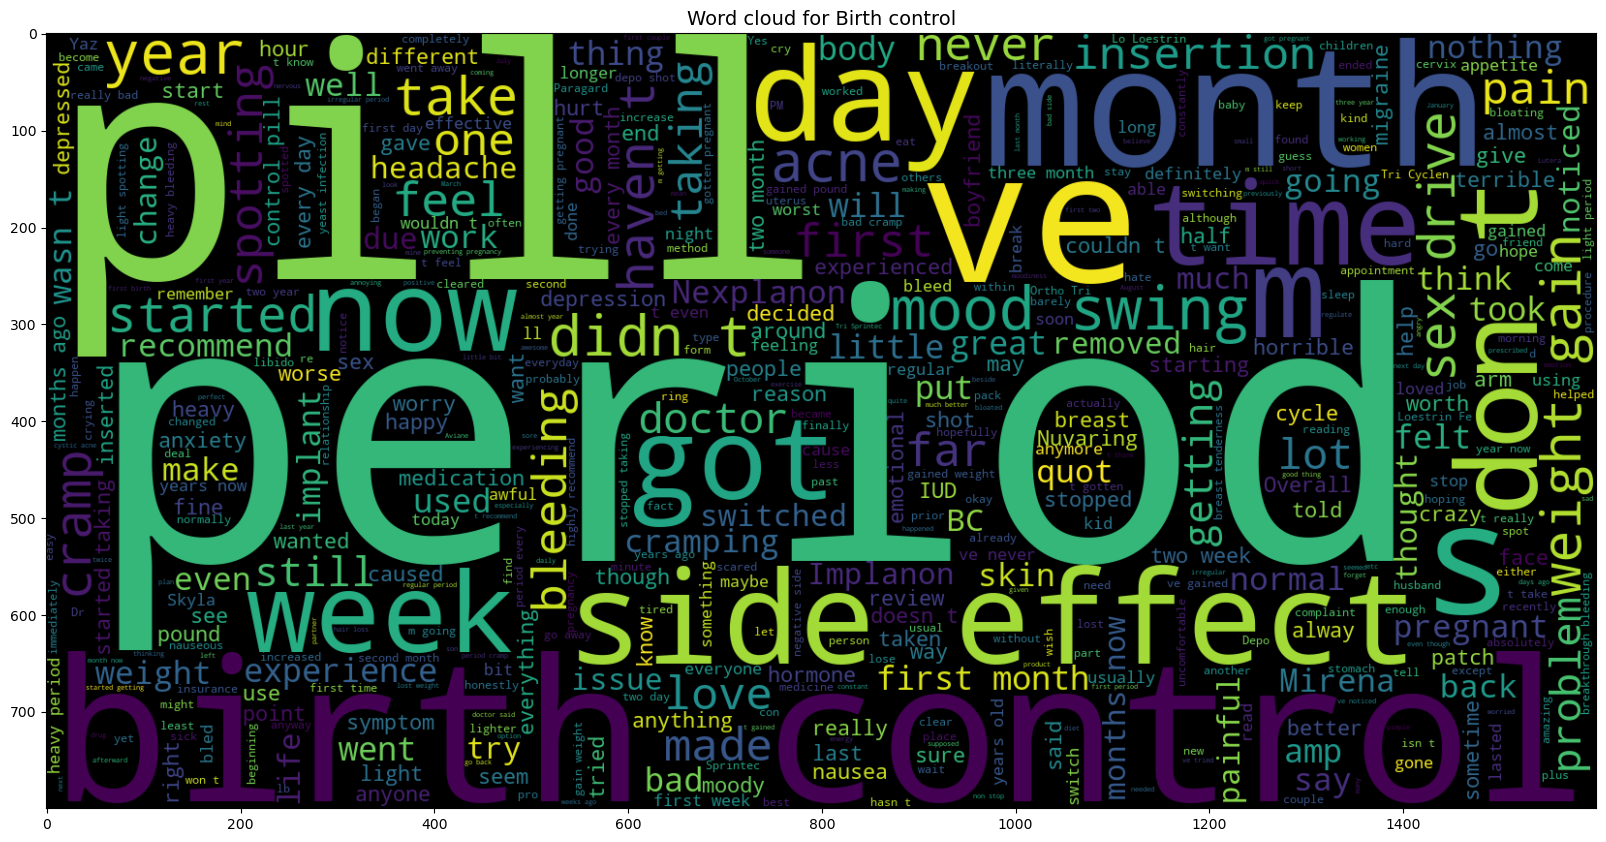

In [13]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_birth.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Birth control',fontsize=14)
plt.show()

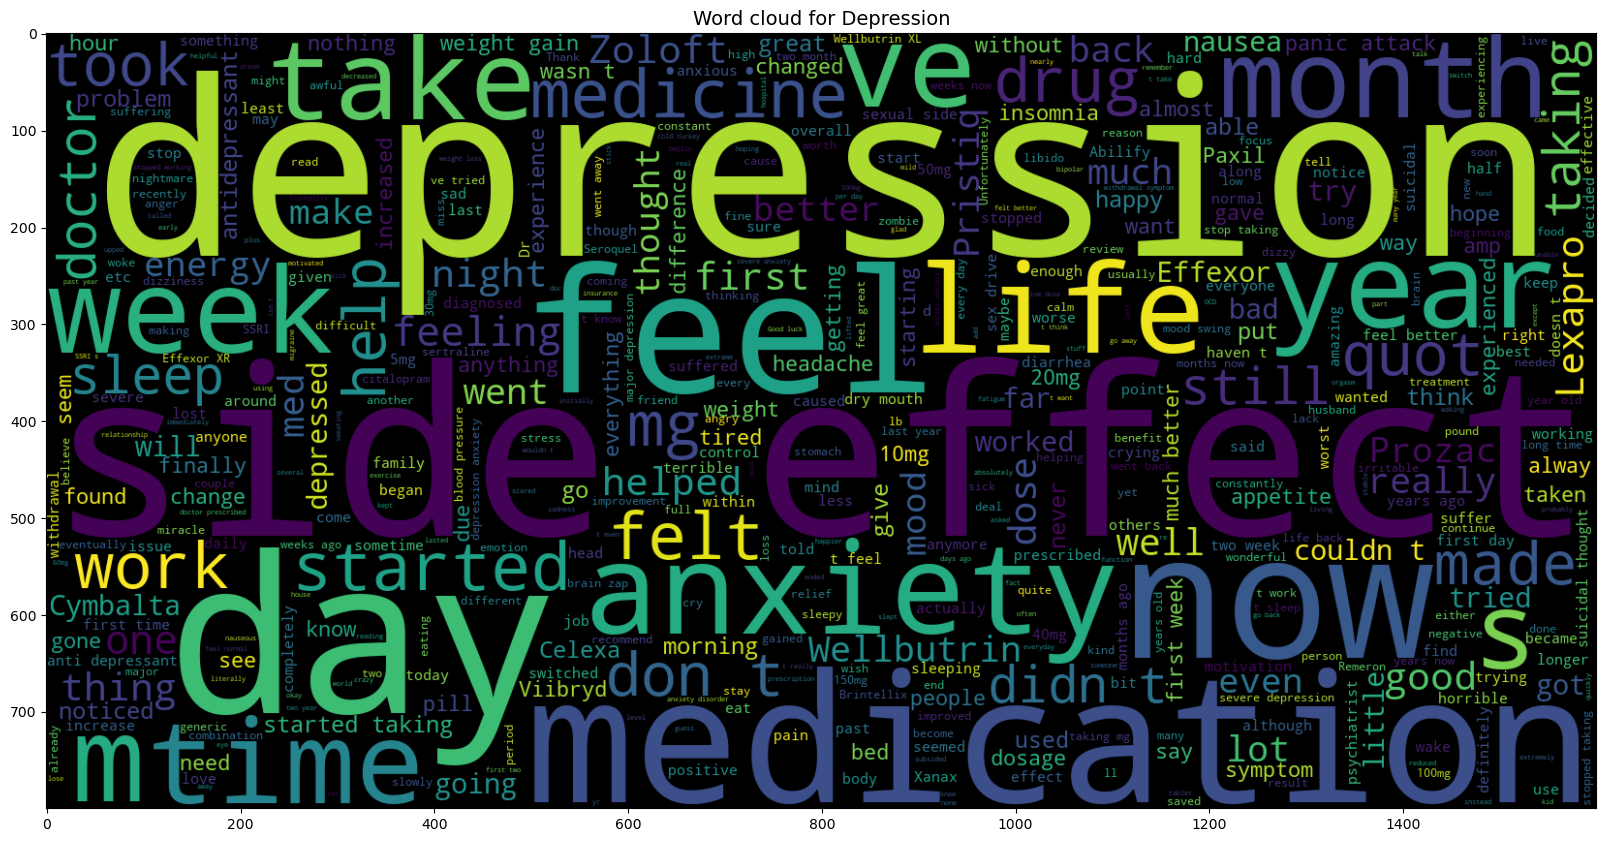

In [14]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_dep.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Depression',fontsize=14)
plt.show()

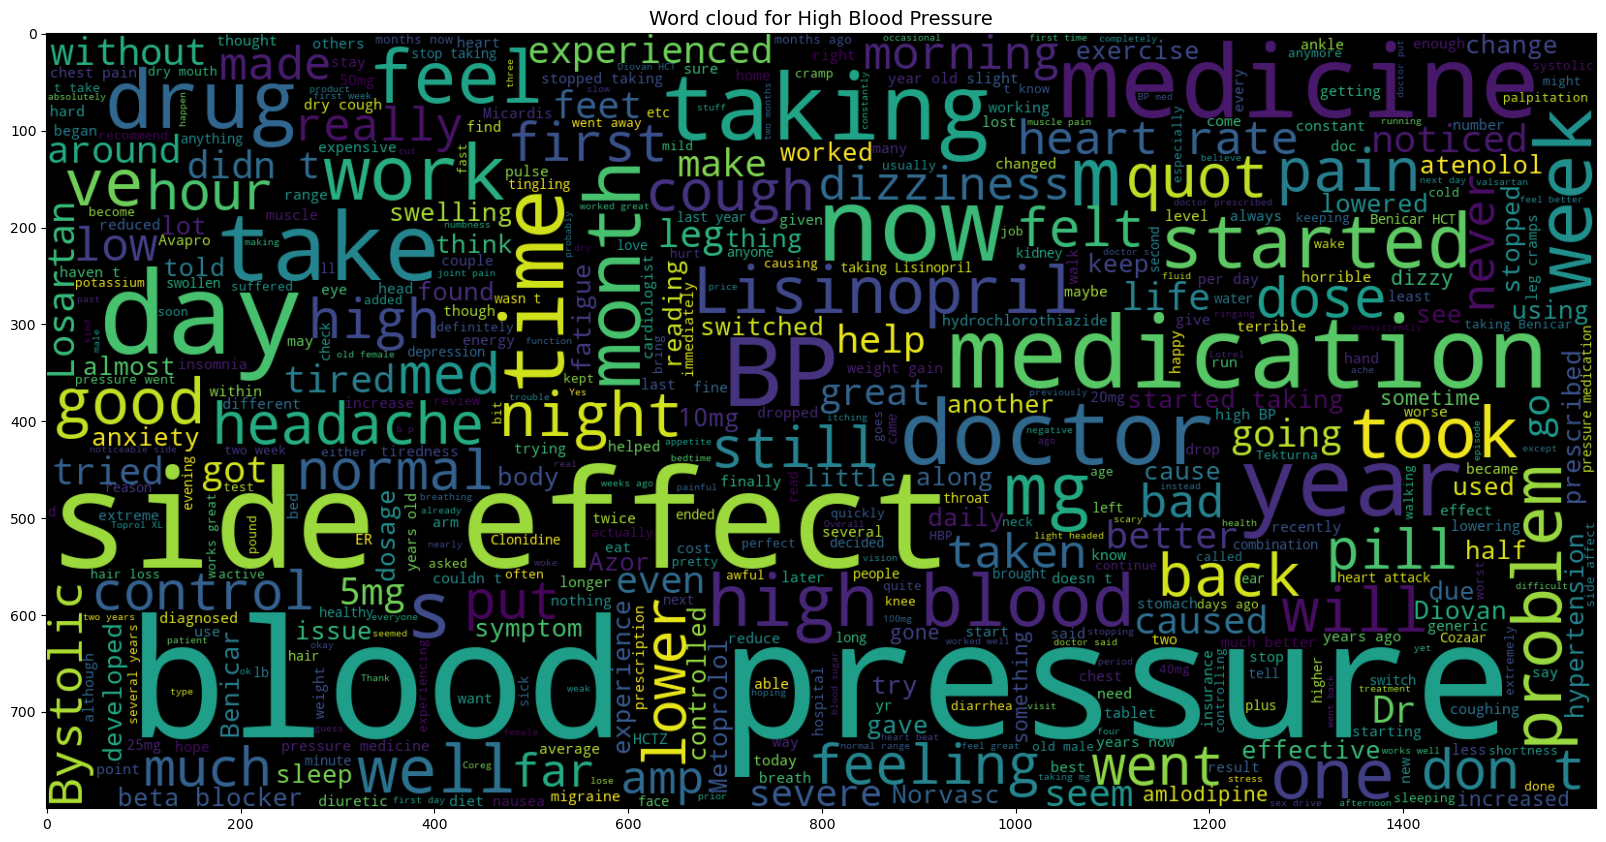

In [15]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_bp.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for High Blood Pressure',fontsize=14)
plt.show()

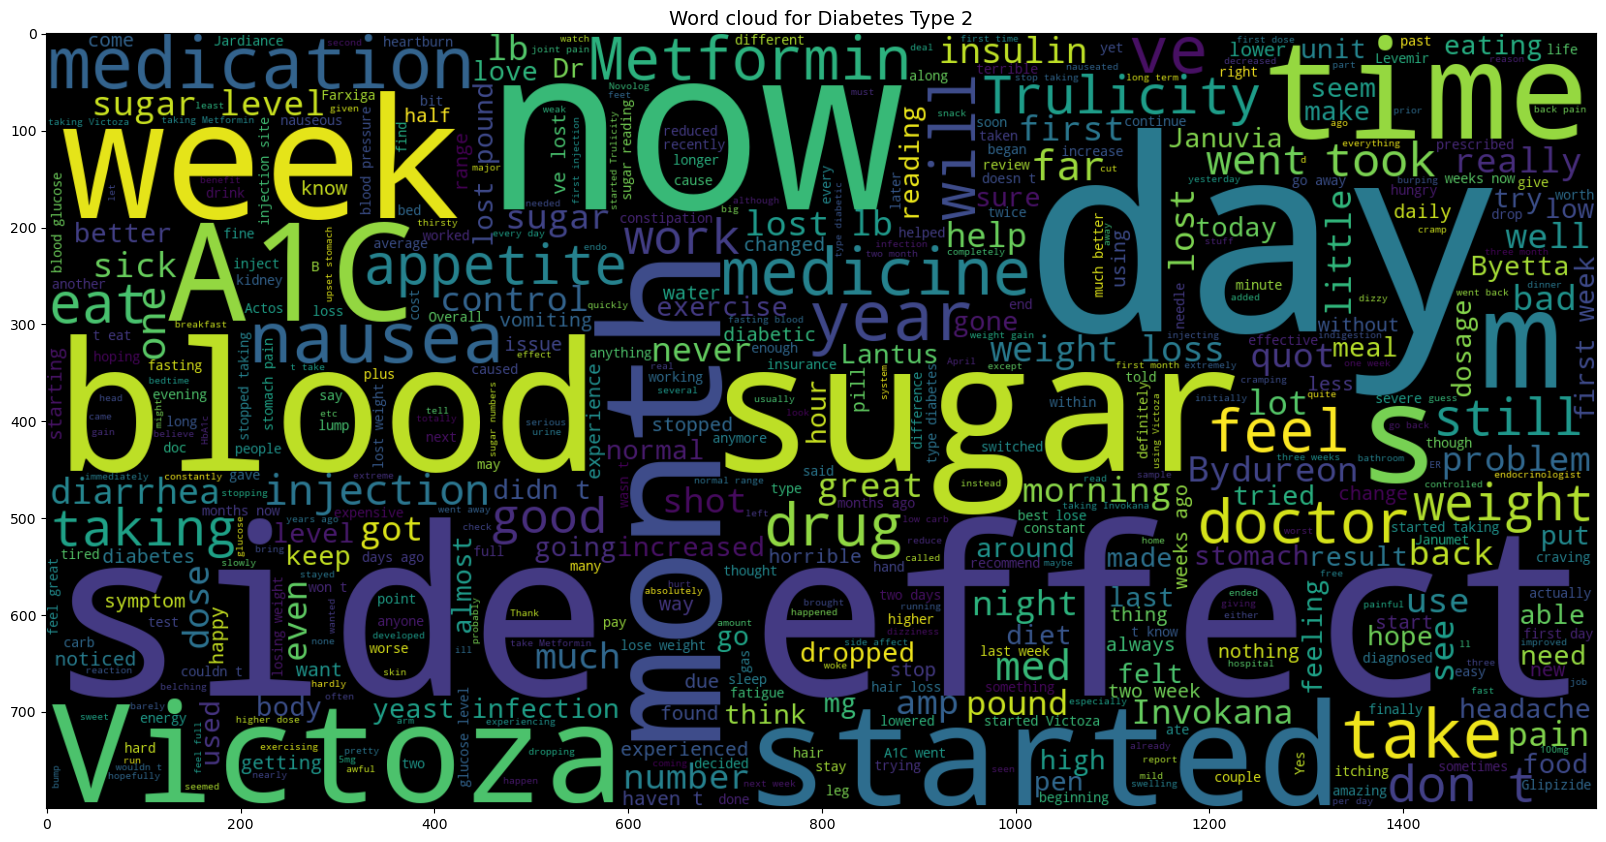

In [16]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_diab.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Diabetes Type 2',fontsize=14)
plt.show()

## Data preprocessing

In [17]:
X['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [18]:
X['review'][11]

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

In [65]:
# First replacing all the quotes
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].replace('"', '')

In [66]:
pd.set_option('display.max_colwidth', None)

In [67]:
X.head()

uniqueID      condition  \
2      92703  Birth Control   
3     138000  Birth Control   
9      48928  Birth Control   
11     75612     Depression   
14     98494  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  review  \
2                                  "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."   
3                                                                                                                                                                                                                                                                                                                                                       "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch"   
9                                                      "I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger."   
11                                                                                                                                                                                                                                                                                                                                  "I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the 

In [93]:
import nltk
nltk.download("stopwords", download_dir="/Users/raaghav/Desktop/ML-Projects/disease-condition-prediction-main/Dependencies")
nltk.data.path.append("/Users/raaghav/Desktop/ML-Projects/disease-condition-prediction-main/Dependencies")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/raaghav/Desktop/ML-Projects/disease-condition-
[nltk_data]     prediction-main/Dependencies...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
from nltk.corpus import stopwords
stop = stopwords.words("english")

In [95]:
stop

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

## Lemmitization

In [106]:
from nltk.stem import WordNetLemmatizer
# from nltk.stem import PorterStemmer

# porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [26]:
# print(porter.stem("sportingly"))
# print(porter.stem("very"))
# print(porter.stem("troubled"))

In [97]:
import nltk

# download wordnet to your custom directory
nltk.download("wordnet", download_dir="/Users/raaghav/Desktop/ML-Projects/disease-condition-prediction-main/Dependencies")

# make sure nltk looks there
nltk.data.path.append("/Users/raaghav/Desktop/ML-Projects/disease-condition-prediction-main/Dependencies")

from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /Users/raaghav/Desktop/ML-
[nltk_data]     Projects/disease-condition-prediction-
[nltk_data]     main/Dependencies...
[nltk_data]   Package wordnet is already up-to-date!


In [109]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("better", pos="a"))     # adjective → good
print(lemmatizer.lemmatize("running", pos="v"))    # verb → run
print(lemmatizer.lemmatize("mice")) 

good
run
mouse


In [73]:
from bs4 import BeautifulSoup
import re

In [100]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [101]:
X['review_clean'] = X['review'].apply(review_to_words)

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_6358/2066199760.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [103]:
X.head()

uniqueID      condition  \
2      92703  Birth Control   
3     138000  Birth Control   
9      48928  Birth Control   
11     75612     Depression   
14     98494  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  review  \
2                                  "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."   
3                                                                                                                                                                                                                                                                                                                                                       "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch"   
9                                                      "I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger."   
11                                                                                                                                                                                                                                                                                                                                  "I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the 

## Creating features and Target Variable

In [76]:
X_feat=X['review_clean']
y=X['condition']

KeyError: 'review_clean'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,stratify=y,test_size=0.2, random_state=0)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## Bag of Words

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

# Learn why we don't use fit_transform but transform
count_test = count_vectorizer.transform(X_test)

In [ ]:
count_train

<45652x17306 sparse matrix of type '<class 'numpy.int64'>'
	with 1458358 stored elements in Compressed Sparse Row format>

Accuracy: 0.969
Confusion matrix, without normalization


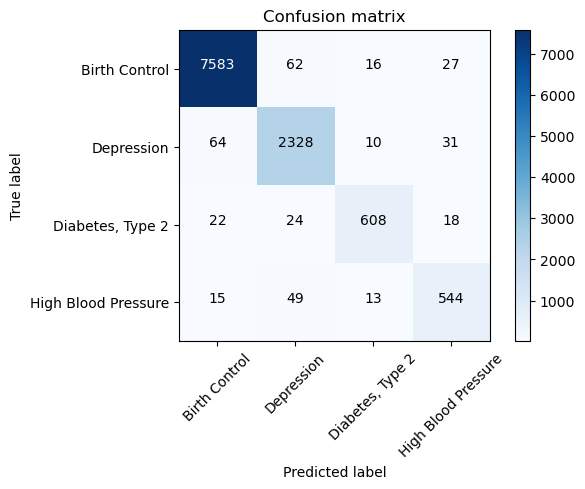


Precision: 0.969
Recall: 0.969
F1 Score: 0.969

Classification Report:

                     precision    recall  f1-score   support

      Birth Control      0.987     0.986     0.987      7688
         Depression      0.945     0.957     0.951      2433
   Diabetes, Type 2      0.940     0.905     0.922       672
High Blood Pressure      0.877     0.876     0.877       621

           accuracy                          0.969     11414
          macro avg      0.937     0.931     0.934     11414
       weighted avg      0.969     0.969     0.969     11414



In [77]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Train and predict
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)

# Accuracy
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)

# Confusion Matrix
cm = metrics.confusion_matrix(
    y_test, pred,
    labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure']
)
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

# Precision, Recall, and F1 Score
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')

print("\nPrecision: %.3f" % precision)
print("Recall: %.3f" % recall)
print("F1 Score: %.3f" % f1)

# Optional: detailed per-class metrics
print("\nClassification Report:\n")
print(classification_report(y_test, pred, digits=3))


## Machine Learning Model : Passive Aggressive Classifier

accuracy:   0.985
Confusion matrix, without normalization


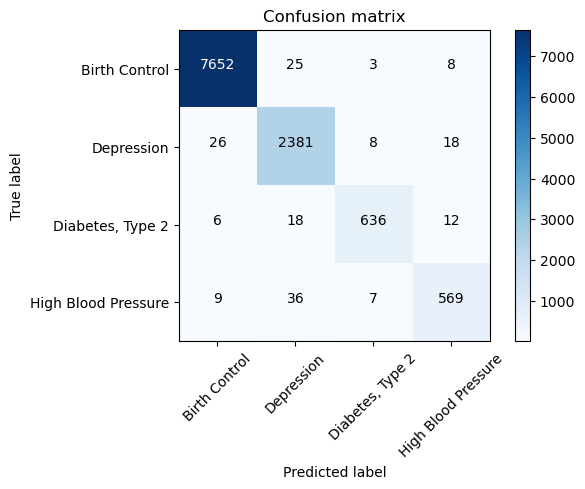

In [78]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## TFIDF

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

## Machine Learning Model : Naive Bayes

Accuracy:   0.933
Confusion matrix, without normalization


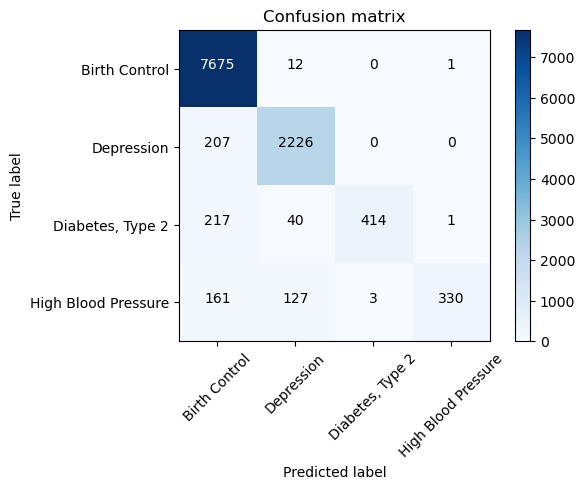


Detailed Metrics:
Precision: 0.936
Recall:    0.933
F1 Score:  0.927

Classification Report:
                     precision    recall  f1-score   support

      Birth Control       0.93      1.00      0.96      7688
         Depression       0.93      0.91      0.92      2433
   Diabetes, Type 2       0.99      0.62      0.76       672
High Blood Pressure       0.99      0.53      0.69       621

           accuracy                           0.93     11414
          macro avg       0.96      0.77      0.83     11414
       weighted avg       0.94      0.93      0.93     11414



In [ ]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, 
                        labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

# Precision, Recall, F1
precision = metrics.precision_score(y_test, pred, average='weighted')
recall = metrics.recall_score(y_test, pred, average='weighted')
f1 = metrics.f1_score(y_test, pred, average='weighted')

print("\nDetailed Metrics:")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")

# Optional: Classification report for per-class details
print("\nClassification Report:")
print(metrics.classification_report(y_test, pred))


## TFIDF with Passive Aggressive Classifier

accuracy:   0.990
Confusion matrix, without normalization


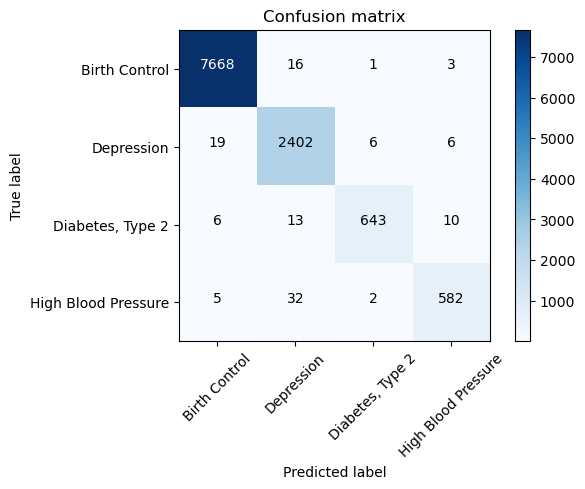

In [88]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## TFIDF: Bigrams

In [89]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

Accuracy:   0.991
Precision:  0.991
Recall:     0.991
F1 Score:   0.991
Confusion matrix, without normalization


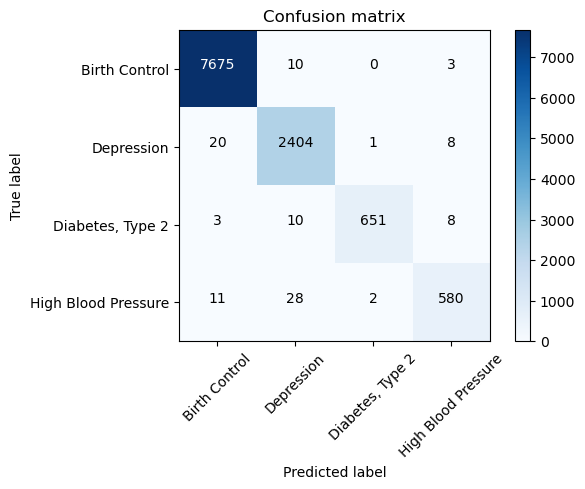


--- Class-wise Performance ---
                     precision    recall  f1-score   support

      Birth Control       1.00      1.00      1.00      7688
         Depression       0.98      0.99      0.98      2433
   Diabetes, Type 2       1.00      0.97      0.98       672
High Blood Pressure       0.97      0.93      0.95       621

           accuracy                           0.99     11414
          macro avg       0.98      0.97      0.98     11414
       weighted avg       0.99      0.99      0.99     11414



In [92]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
import numpy as np

# Train the model
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)

# Predictions
pred = pass_tf.predict(tfidf_test_2)

# Overall Accuracy
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:   %0.3f" % score)

# Weighted Precision, Recall, and F1
precision = metrics.precision_score(y_test, pred, average='weighted')
recall = metrics.recall_score(y_test, pred, average='weighted')
f1 = metrics.f1_score(y_test, pred, average='weighted')

print("Precision:  %0.3f" % precision)
print("Recall:     %0.3f" % recall)
print("F1 Score:   %0.3f" % f1)

# Confusion Matrix
cm = metrics.confusion_matrix(
    y_test, pred,
    labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure']
)

# Plot Confusion Matrix
plot_confusion_matrix(
    cm,
    classes=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure']
)

# Class-wise Precision, Recall, and F1
print("\n--- Class-wise Performance ---")
print(metrics.classification_report(
    y_test, pred,
    target_names=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure']
))



## TFIDF : Trigrams

accuracy:   0.990
Confusion matrix, without normalization


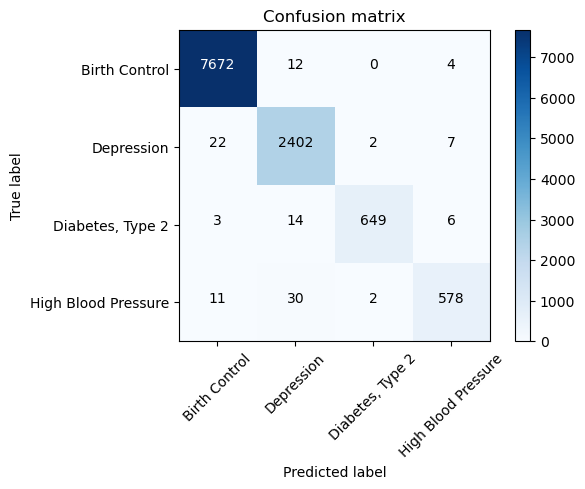

In [84]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## Most important Features

In [85]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print (classlabel, feat, coef)



most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Birth Control')

Birth Control sedation 0.4945865743101572
Birth Control shampoo 0.5197843857312876
Birth Control victim 0.5379131833597769
Birth Control victimization 0.5379131833597769
Birth Control admittedly 0.5524801153990874
Birth Control cybalta 0.6127247522832076
Birth Control pinpoint 0.7099889862109671
Birth Control unqualified 0.8739022925312976
Birth Control conjunction 1.3316915445910233
Birth Control gooey 7.601447215662572


In [47]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Depression')

Depression starvation 0.6272273962099686
Depression bincar 0.6478616418475721
Depression thought 0.6520769631999656
Depression dizziniess 0.6618304869405317
Depression unclamped 0.8651404853009743
Depression thts 0.9007832664935992
Depression stack 1.1322074422739403
Depression atm 1.18794327158438
Depression appreciated 1.2755281552170754
Depression alost 4.05722031299525


In [48]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'High Blood Pressure')

High Blood Pressure suffice 0.5313355803715435
High Blood Pressure excruitating 0.5938252788355474
High Blood Pressure generalized 0.6155297735584343
High Blood Pressure beautifull 0.6190764283687545
High Blood Pressure frightful 0.6219159146656261
High Blood Pressure exactly 0.6404733219747502
High Blood Pressure exam 0.6485788418559336
High Blood Pressure friendship 0.7649395532011556
High Blood Pressure spongebob 0.8159345560742912
High Blood Pressure giavani 1.069875195999268


In [49]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Diabetes, Type 2')

Diabetes, Type 2 exfoliate 0.32966535477671277
Diabetes, Type 2 perforated 0.35323048823617437
Diabetes, Type 2 perforating 0.35323048823617437
Diabetes, Type 2 recover 0.4295867099233824
Diabetes, Type 2 admittedly 0.44813280028576163
Diabetes, Type 2 bedrock 0.5767983527197952
Diabetes, Type 2 perceived 0.6755229133010908
Diabetes, Type 2 glucophage 0.7013787094368894
Diabetes, Type 2 record 0.7267578665866268
Diabetes, Type 2 recently 2.9911094368086784


## Sample Predictions

In [50]:
X.tail()

uniqueID      condition  \
215029     28754     Depression   
215038    131040  Birth Control   
215056     33495  Birth Control   
215057    123432  Birth Control   
215060    130945  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              review  \
215029                                         "I&#039;m a 19 year old girl and I&#039;ve been suffering from major depression and social anxiety for the past 5 years. I finally went to the doctors and was prescribed Lexapro 10mg. I&#039;ve been on it for 4 days now. I had side effects the first day I took it - nausea, slight headache, slight dizziness, sleepy and yawning a lot and most annoyingly INSOMNIA! I even felt a little confused at bedtime while trying to sleep. The side effects lasted for the first 3 days, now they&#039;re slowly going away. The first day I was really hyper and the next I was so tired but now it&#039;s starting to balance out and I can sleep better. I haven&#039;t had a depressing day since I&#039;ve been taking Lexapro so lets hope it stays that way."   
215038    "I first would like to thank all of you that posted comments. After reading them, I felt I&#039;m not alone. It&#039;s not just happening to me, there is nothing wrong with me. I&#039;m 34, with one child and had Mirena for 5 months. The insertion was almost painless and the first month was fine. Right now, I have gained 10lbs, loss of sex drive, have headaches, back pain, insomnia, constipation, hair loss and general depression - OF COURSE that&#039;s going to cause to have mood swings. I&#039;m waiting on an appointment to have it removed. ANOTHER IMPORTANT ASPECT is that I had suffered from postpartum depression after the birth of my child 4 years ago and honestly I was worried that these side effects (especially  depression) were a sign that I was still not okay."   
215056                                                                    "I was on Microgestin for about 3 years. Over the past year, I started to get extremely bad headaches during the sugar pill week. I took extra strength Tylenol the entire week, twice a day, and it still didn&#039;t make my headaches go away. I also would feel very lightheaded and nauseous. I had to leave work early, it was bad. The only good thing was I&#039;ve had the same box of tampons for the entire year. I barely had a period. Oh yeah, I also got high pigmentation right above my lips. They call it a &quot;pregnancy mask&quot; but you can get it with certain birth control. It is very dark and it is difficult to hide with makeup! I&#039;m not a big fan of having a weird skin mustache so I went off it."   
215057                                                                                                                                                                                                                                                                                                         "I started taking Apri about 7 months ago. My breats got noticeably larger within the first few weeks and I gained about 10 pounds, but I&#039;m a thin girl anyway so I gladly take on the extra few pounds and curves. I got prescribed this birth control because of my ovarian cysts and since I have not had any problems with th

In [51]:
text =["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."]
test = tfidf_vectorizer3.transform(text)
pred1=pass_tf.predict(test)[0]
pred1

'High Blood Pressure'

In [52]:
text =["This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap."]
test = tfidf_vectorizer3.transform(text)
pred1=pass_tf.predict(test)[0]
pred1

'Depression'

In [53]:
text =["I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me"]
test = tfidf_vectorizer3.transform(text)
pred1=pass_tf.predict(test)[0]
pred1

'Diabetes, Type 2'